# L'analyse du dataset mnist en tensorflow 

## Importataion des packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
plt.style.use('ggplot')

## Création du dataset

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(f'Taille des données d\'entrainement: {X_train.shape}')
print(f'Taille des données de teste: {X_test.shape}')

Taille des données d'entrainement: (60000, 28, 28)
Taille des données de teste: (10000, 28, 28)


## Création du modèle

In [12]:
modele = keras.Sequential(
 [
     keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
     keras.layers.Dense(units = 128, activation = tf.nn.relu),
     keras.layers.Dense(10, activation = tf.nn.softmax )
 ]
)

modele.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Entrainement du modèle

In [14]:
modele.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 3.4956 - accuracy: 0.6887: 0s - loss: 3.6590 - accura
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7192 - accuracy: 0.7426
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6211 - accuracy: 0.7792
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5525 - accuracy: 0.8154
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5231 - accuracy: 0.8249
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5069 - accuracy: 0.8303
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4910 - accuracy: 0.8346
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4886 - accuracy: 0.8361
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4693 - accuracy: 0.8400
Epoch 10/50
1875/1875 [==============================]

## Evaluation du modèle

In [15]:
modele.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5785 - accuracy: 0.8250


[0.5785151720046997, 0.824999988079071]

## Prédiction du modèle

In [16]:
y_pred = modele.predict(X_test)

In [17]:
y_test[0]

9

In [18]:
np.argmax(y_pred[0])

9

## Determinons la matrice de confusion

In [19]:
y_labels = [np.argmax(y) for y in y_pred]

In [22]:
cm = tf.math.confusion_matrix(predictions=y_labels, labels=y_test)

Text(0.5, 24.0, 'valeur réelle')

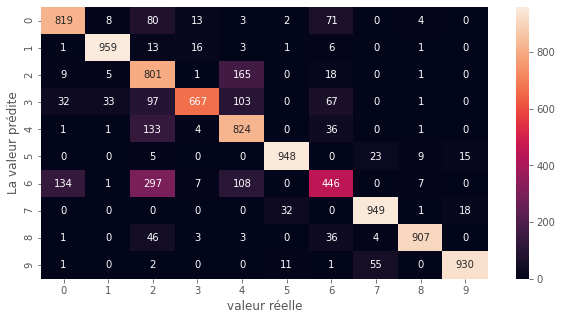

In [25]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('La valeur prédite')
plt.xlabel('valeur réelle')